# Analysis

This notebook looks at the following:

1) Does the speech sentiment correlate to the bank report (FSR and MPR) sentiment

## Technical notes

This notebook was created using:

* Python 3.11.5 | packaged by Anaconda, Inc.
* Juypter Notebook: 2.1.1
* Numpy version: 1.25.2
* Pandas version: 2.1.1
* Seaborn version: 0.13
* Plotly version: 5.9.0

Last run on 15/04/2024 by Emma Roberts and returned 0 warnings or errors.

## Library and Data import

In [1]:
# Imports
import numpy as np
import pandas as pd
import os
import warnings
import datetime

# Supress warnings
warnings.filterwarnings('ignore')

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Create user defined function for import and checking
def import_and_check(file_path):
    # Import limited to csv and xlsx given provided data
    data = (
        pd.read_csv(file_path) 
        if file_path.endswith('.csv') 
        else pd.read_excel(file_path))

    # Check for missing values
    missing_values = data.isnull().sum()

    # Display shape and data types
    print(data.shape)
    print(' ')
    print(data.dtypes)
    print(' ')
    
    # Display missing values
    print(missing_values)

    # Check for duplicate records
    duplicate_records = data[data.duplicated()]
    
    # Display duplicate records
    if not duplicate_records.empty:
        print('\nDuplicate Records:')
        display(duplicate_records)
    else:
        print('\nNo Duplicate Records Found.')

    # Display head and tail for headers, 
    # footers, and to confirm data loaded successfully
    display(data.head())
    display(data.tail())
    
    return data

In [3]:
# List all files in the working directory
files = ['all_data.csv', 'fsr_finbert_scores_final.csv', 'mpc_finbert_scores_final.csv']

# Create a dictionary to store dataframes
dataframes = {}

# Iterate over each file
for file_name in files:
    # Don't attempt to self-import the J-notebook!
    if not file_name.endswith('.ipynb'):
        # Remove the file extension
        name_without_extension = os.path.splitext(file_name)[0]
        print(f"\nSummary for file: {file_name}")
        # Import and check data, and store in the dictionary with the filename as key
        dataframes[name_without_extension] = import_and_check(file_name)

# Extract dataframes and assign them to individual variables
for df_name, df in dataframes.items():
    globals()[df_name] = df


Summary for file: all_data.csv
(6126, 33)
 
date                 object
reference            object
country              object
title                object
author               object
is_gov                 bool
word_count            int64
body                 object
central_bank         object
year                  int64
language             object
vader_polarity      float64
lm_polarity         float64
finbert_polarity    float64
boe_speech             bool
fed_speech             bool
fsr                    bool
mpr                    bool
ftse_250            float64
base_rate           float64
brent_price         float64
cpi                 float64
euro                float64
ftse_100            float64
gdp_million           int64
gold_price            int64
avg_house_price     float64
1_mo_bond           float64
10_yr_bond          float64
2_yr_bond           float64
unemployment        float64
usd                 float64
wage_growth         float64
dtype: object
 
date           

,date,reference,country,title,author,is_gov,word_count,body,central_bank,year,...,ftse_100,gdp_million,gold_price,avg_house_price,1_mo_bond,10_yr_bond,2_yr_bond,unemployment,usd,wage_growth
0,04/01/1999,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,5879.399902,255773,289,72903.17681,6.023,4.287,4.899,6.2,1.6585,NaN
1,05/01/1999,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,5958.200195,255773,289,72903.17681,6.022,4.330,4.895,6.2,1.6542,NaN
2,06/01/1999,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,6148.799805,255773,290,72903.17681,6.022,4.319,4.917,6.2,1.6549,NaN
3,07/01/1999,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,6101.200195,255773,293,72903.17681,6.022,4.277,4.941,6.2,1.6520,NaN
4,08/01/1999,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,6147.200195,255773,293,72903.17681,6.019,4.252,4.810,6.2,1.6423,NaN


,date,reference,country,title,author,is_gov,word_count,body,central_bank,year,...,ftse_100,gdp_million,gold_price,avg_house_price,1_mo_bond,10_yr_bond,2_yr_bond,unemployment,usd,wage_growth
6121,14/10/2022,r221012a_BOE,United Kingdom,Monetary policy: an anchor in challenging times,Pill,False,3567,BOE,Bank of England,2022,...,6858.799805,645805,1649,291193.0,2.208,4.323,3.877,3.8,1.1170,6.6
6122,17/10/2022,r221015a_BOE,United Kingdom,Monetary policy and financial stability interv...,Bailey,True,1767,BOE,Bank of England,2022,...,6920.200195,645805,1664,291193.0,2.106,3.981,3.559,3.8,1.1353,6.6
6123,18/10/2022,r221015a_BOE,United Kingdom,Monetary policy and financial stability interv...,Bailey,True,1767,BOE,Bank of England,2022,...,6936.700195,645805,1656,291193.0,2.329,3.943,3.547,3.8,1.1318,6.6
6124,19/10/2022,r221019a_BOE,United Kingdom,Governance of â€œDecentralisedâ€ Finance: Get...,Wilkins,False,5382,BOE,Bank of England,2022,...,6925.000000,645805,1634,291193.0,2.292,3.871,3.465,3.8,1.1214,6.6
6125,20/10/2022,r221020a_BOE,United Kingdom,The inflationary consequences of real shocks,Broadbent,False,6035,BOE,Bank of England,2022,...,6943.899902,645805,1637,291193.0,2.252,3.904,3.560,3.8,1.1233,6.6



Summary for file: fsr_finbert_scores_final.csv
(48, 2)
 
date                     object
fsr_finbert_polarity    float64
dtype: object
 
date                    0
fsr_finbert_polarity    0
dtype: int64

No Duplicate Records Found.


,date,fsr_finbert_polarity
0,18/06/1999,-0.023323
1,26/11/1999,-0.013965
2,29/06/2000,0.007188
3,14/12/2000,-0.058646
4,28/06/2001,-0.024706


,date,fsr_finbert_polarity
43,11/12/2020,-0.084665
44,13/07/2021,0.157170
45,13/12/2021,-0.050305
46,05/07/2022,-0.421359
47,13/12/2022,-0.274323



Summary for file: mpc_finbert_scores_final.csv
(96, 2)
 
date                     object
mpc_finbert_polarity    float64
dtype: object
 
date                    0
mpc_finbert_polarity    0
dtype: int64

No Duplicate Records Found.


,date,mpc_finbert_polarity
0,1999-02-10,-0.229519
1,1999-05-12,-0.073518
2,1999-08-11,0.136037
3,1999-11-10,0.129230
4,2000-02-17,0.197938


,date,mpc_finbert_polarity
91,2021-11-04,-0.185102
92,2022-02-03,-0.071526
93,2022-05-05,-0.179852
94,2022-08-04,-0.148186
95,2022-11-03,-0.167030


In [4]:
# Subset
speech = all_data[['date', 'finbert_polarity']]

# View
speech.head()

,date,finbert_polarity
0,04/01/1999,-0.007072
1,05/01/1999,-0.007072
2,06/01/1999,-0.007072
3,07/01/1999,-0.007072
4,08/01/1999,-0.007072


In [5]:
# View
fsr_finbert_scores_final.head()

,date,fsr_finbert_polarity
0,18/06/1999,-0.023323
1,26/11/1999,-0.013965
2,29/06/2000,0.007188
3,14/12/2000,-0.058646
4,28/06/2001,-0.024706


In [6]:
# View
mpc_finbert_scores_final.head()

,date,mpc_finbert_polarity
0,1999-02-10,-0.229519
1,1999-05-12,-0.073518
2,1999-08-11,0.136037
3,1999-11-10,0.129230
4,2000-02-17,0.197938


In [7]:
# make names shorter to save typing
mpc = mpc_finbert_scores_final
fsr = fsr_finbert_scores_final

In [8]:
# Check date type
speech.dtypes

date                 object
finbert_polarity    float64
dtype: object

In [9]:
# Check date type
mpc.dtypes

date                     object
mpc_finbert_polarity    float64
dtype: object

In [10]:
# Check date type
fsr.dtypes

date                     object
fsr_finbert_polarity    float64
dtype: object

In [11]:
# Convert to datetime
speech['date'] = pd.to_datetime(speech['date'], format='%d/%m/%Y')

In [12]:
# Convert to datetime
mpc['date'] = pd.to_datetime(mpc['date'], format='%Y-%m-%d')

In [13]:
# Convert to datetime
fsr['date'] = pd.to_datetime(fsr['date'], format='%d/%m/%Y')

In [14]:
# View to check
speech.head()

,date,finbert_polarity
0,1999-01-04,-0.007072
1,1999-01-05,-0.007072
2,1999-01-06,-0.007072
3,1999-01-07,-0.007072
4,1999-01-08,-0.007072


In [15]:
# View to check
mpc.head()

,date,mpc_finbert_polarity
0,1999-02-10,-0.229519
1,1999-05-12,-0.073518
2,1999-08-11,0.136037
3,1999-11-10,0.129230
4,2000-02-17,0.197938


In [16]:
# View to check
fsr.head()

,date,fsr_finbert_polarity
0,1999-06-18,-0.023323
1,1999-11-26,-0.013965
2,2000-06-29,0.007188
3,2000-12-14,-0.058646
4,2001-06-28,-0.024706


In [17]:
# Check type prior to join
speech.dtypes

date                datetime64[ns]
finbert_polarity           float64
dtype: object

In [18]:
# Check type prior to join
mpc.dtypes

date                    datetime64[ns]
mpc_finbert_polarity           float64
dtype: object

In [19]:
# Check type prior to join
fsr.dtypes

date                    datetime64[ns]
fsr_finbert_polarity           float64
dtype: object

In [20]:
# Left join 'speech' with 'mpc' and forward fill missing values
merged_df = speech.merge(mpc, on='date', how='left')
merged_df['mpc_finbert_polarity'] = merged_df['mpc_finbert_polarity'].ffill()

# Left join 'speech' with 'fsr' and forward fill missing values
merged_df = merged_df.merge(fsr, on='date', how='left')
merged_df['fsr_finbert_polarity'] = merged_df['fsr_finbert_polarity'].ffill()

# Display the resulting DataFrame
merged_df

,date,finbert_polarity,mpc_finbert_polarity,fsr_finbert_polarity
0,1999-01-04,-0.007072,NaN,NaN
1,1999-01-05,-0.007072,NaN,NaN
2,1999-01-06,-0.007072,NaN,NaN
3,1999-01-07,-0.007072,NaN,NaN
4,1999-01-08,-0.007072,NaN,NaN
...,...,...,...,...
6121,2022-10-14,-0.011488,-0.148186,-0.421359
6122,2022-10-17,-0.070586,-0.148186,-0.421359
6123,2022-10-18,-0.070586,-0.148186,-0.421359
6124,2022-10-19,0.000144,-0.148186,-0.421359


<Axes: xlabel='date', ylabel='finbert_polarity'>

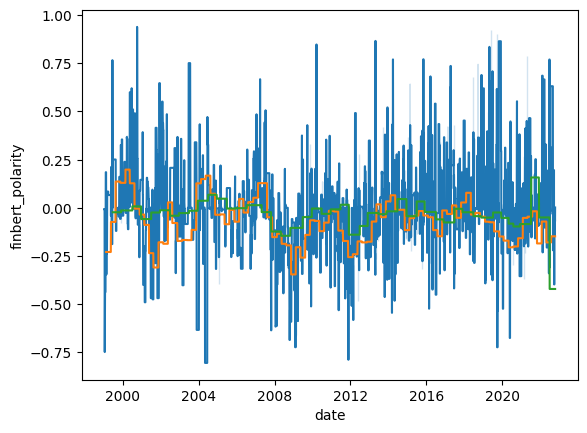

In [21]:
# Plot to check overall pattern
sns.lineplot(data=merged_df,
             x='date',
             y='finbert_polarity')

sns.lineplot(data=merged_df,
             x='date',
             y='mpc_finbert_polarity')

sns.lineplot(data=merged_df,
             x='date',
             y='fsr_finbert_polarity')

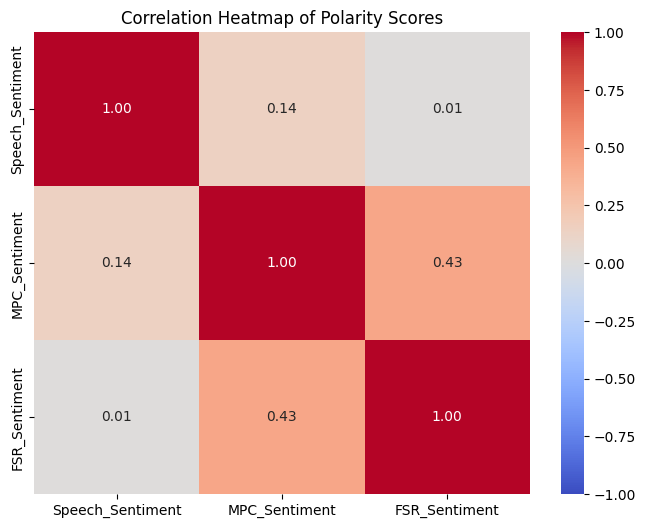

In [22]:
# Rename coloumns to make it more meaningful:
merged_df.rename(columns={
    'finbert_polarity': 'Speech_Sentiment',
    'mpc_finbert_polarity': 'MPC_Sentiment',
    'fsr_finbert_polarity': 'FSR_Sentiment'
}, inplace=True)

# Calculate correlation matrix
correlation_matrix = merged_df[['Speech_Sentiment', 'MPC_Sentiment', 'FSR_Sentiment']].corr()

# Plot correlation heatmap with specified range
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Polarity Scores')
plt.show()